# 🚗 Mercedes-Benz Vehicle Price Prediction: Three Powerful Models Comparison

In this project, we'll compare **XGBoost**, **LightGBM**, and **CatBoost** models on Mercedes-Benz vehicle dataset to achieve the best price prediction performance.

## 📊 About the Dataset
- **13,119** Mercedes-Benz vehicle records
- **9** different features (model, year, mileage, fuel type, etc.)
- **Target**: Vehicle price prediction (Regression problem)

## 🎯 Models to Compare
1. **XGBoost** - Excellent performance with categorical variables
2. **LightGBM** - Fast training and high accuracy
3. **CatBoost** - Powerful results with minimal preprocessing

## 📚 Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries loaded successfully!")

✅ All libraries loaded successfully!


## 📥 Data Loading and Initial Exploration

Let's load our dataset and examine its basic characteristics.

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv')

print("🔍 Dataset Basic Information:")
print(f"📏 Data shape: {df.shape}")
print(f"🏷️ Number of columns: {len(df.columns)}")
print("\n📋 First 5 rows:")
print(df.head())

🔍 Dataset Basic Information:
📏 Data shape: (13119, 9)
🏷️ Number of columns: 9

📋 First 5 rows:
       model  year  price transmission  mileage fuelType  tax   mpg  \
0        SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1    S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2   SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3    G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4    G Class  2016  73948    Automatic     4000   Petrol  325  30.1   

   engineSize  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0  


## 🔧 Data Preprocessing and Feature Engineering

We'll create new features to help our models perform better.

In [3]:
# Feature Engineering
df['age'] = 2024 - df['year']  # Vehicle age
df['mileage_per_year'] = df['mileage'] / (df['age'] + 1)  # Average annual mileage
df['price_per_mpg'] = df['price'] / df['mpg']  # Price per MPG

In [4]:
# Encode categorical variables (for XGBoost and LightGBM)
label_encoders = {}
categorical_columns = ['model', 'transmission', 'fuelType']

for col in categorical_columns:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

print("✨ Feature Engineering completed!")
print(f"🆕 New features: age, mileage_per_year, price_per_mpg")
print(f"📊 Updated data shape: {df.shape}")

✨ Feature Engineering completed!
🆕 New features: age, mileage_per_year, price_per_mpg
📊 Updated data shape: (13119, 15)


## 📈 Data Visualization and Exploratory Data Analysis

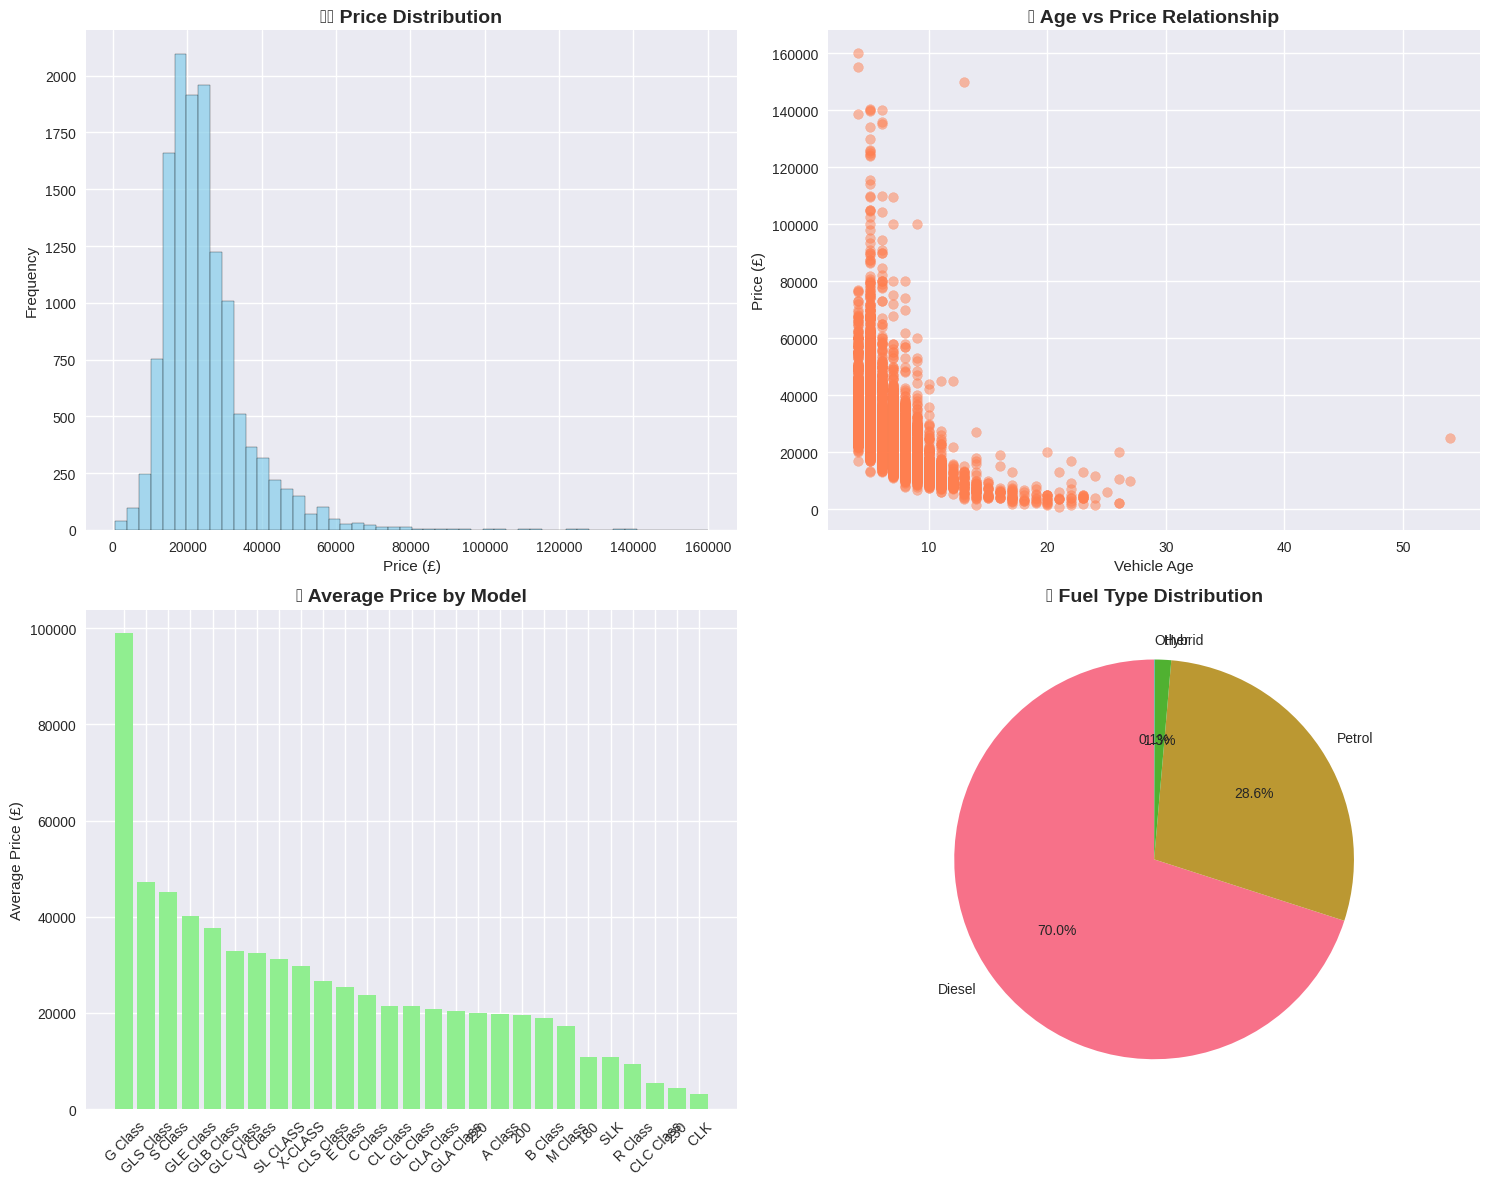

📊 Data visualization completed!


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price distribution
axes[0, 0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('🏷️ Price Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price (£)')
axes[0, 0].set_ylabel('Frequency')

# Age vs Price
axes[0, 1].scatter(df['age'], df['price'], alpha=0.5, color='coral')
axes[0, 1].set_title('📅 Age vs Price Relationship', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Vehicle Age')
axes[0, 1].set_ylabel('Price (£)')

# Average price by model
model_prices = df.groupby('model')['price'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(model_prices)), model_prices.values, color='lightgreen')
axes[1, 0].set_title('🚗 Average Price by Model', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(len(model_prices)))
axes[1, 0].set_xticklabels(model_prices.index, rotation=45)
axes[1, 0].set_ylabel('Average Price (£)')

# Fuel type distribution
fuel_counts = df['fuelType'].value_counts()
axes[1, 1].pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('⛽ Fuel Type Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Data visualization completed!")

## 🎯 Data Splitting and Model Preparation

Let's split the data into training and test sets and prepare appropriate formats for each model.

In [6]:
# Feature selection
features_xgb_lgb = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'age', 
                    'mileage_per_year', 'model_encoded', 'transmission_encoded', 'fuelType_encoded']

features_catboost = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'age', 
                     'mileage_per_year', 'model', 'transmission', 'fuelType']

target = 'price'

In [7]:
# Split the data
X_xgb_lgb = df[features_xgb_lgb]
X_catboost = df[features_catboost]
y = df[target]

X_train_xgb, X_test_xgb, y_train, y_test = train_test_split(X_xgb_lgb, y, test_size=0.2, random_state=42)
X_train_cb, X_test_cb, _, _ = train_test_split(X_catboost, y, test_size=0.2, random_state=42)

print(f"📊 Training set size: {X_train_xgb.shape}")
print(f"📊 Test set size: {X_test_xgb.shape}")
print(f"🎯 Target variable: {target}")

📊 Training set size: (10495, 10)
📊 Test set size: (2624, 10)
🎯 Target variable: price


## 🚀 Model 1: XGBoost - Powerful Gradient Boosting

Let's build and train our XGBoost model. This model works excellently with categorical variables and is resistant to overfitting.

In [8]:
print("🚀 Training XGBoost Model...")

# XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50,
    eval_metric='rmse'
)

🚀 Training XGBoost Model...


In [9]:
# Model training
xgb_model.fit(
    X_train_xgb, y_train,
    eval_set=[(X_test_xgb, y_test)],
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
# Predictions
xgb_predictions = xgb_model.predict(X_test_xgb)

In [11]:
# Performance metrics
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_r2 = r2_score(y_test, xgb_predictions)

print("✅ XGBoost Training Completed!")
print(f"📊 MAE: {xgb_mae:.2f}")
print(f"📊 RMSE: {xgb_rmse:.2f}")
print(f"📊 R² Score: {xgb_r2:.4f}")

✅ XGBoost Training Completed!
📊 MAE: 1551.52
📊 RMSE: 2705.78
📊 R² Score: 0.9531


## ⚡ Model 2: LightGBM - Fast and Efficient

Let's build and train our LightGBM model. This model provides fast training and high performance.

In [12]:
print("\n⚡ Training LightGBM Model...")

# LightGBM model
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50,
    verbose=-1
)


⚡ Training LightGBM Model...


In [13]:
# Model training
lgb_model.fit(
    X_train_xgb, y_train,
    eval_set=[(X_test_xgb, y_test)],
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[986]	valid_0's l2: 6.24688e+06


LGBMRegressor(colsample_bytree=0.8, early_stopping_rounds=50, max_depth=6,
              n_estimators=1000, random_state=42, subsample=0.8, verbose=-1)

In [14]:
# Predictions
lgb_predictions = lgb_model.predict(X_test_xgb)

In [15]:
# Performance metrics
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_predictions))
lgb_r2 = r2_score(y_test, lgb_predictions)

print("✅ LightGBM Training Completed!")
print(f"📊 MAE: {lgb_mae:.2f}")
print(f"📊 RMSE: {lgb_rmse:.2f}")
print(f"📊 R² Score: {lgb_r2:.4f}")

✅ LightGBM Training Completed!
📊 MAE: 1536.47
📊 RMSE: 2499.38
📊 R² Score: 0.9600


## 🐱 Model 3: CatBoost - Categorical Variable Expert

Let's build and train our CatBoost model. This model automatically handles categorical variables and requires minimal preprocessing.

In [16]:
print("\n🐱 Training CatBoost Model...")

# Define categorical features
cat_features = ['model', 'transmission', 'fuelType']

# CatBoost model
cb_model = cb.CatBoostRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    early_stopping_rounds=50,
    verbose=False
)


🐱 Training CatBoost Model...


In [17]:
# Model training
cb_model.fit(
    X_train_cb, y_train,
    eval_set=[(X_test_cb, y_test)],
    cat_features=cat_features,
    use_best_model=True
)

In [18]:
# Predictions
cb_predictions = cb_model.predict(X_test_cb)

In [19]:
# Performance metrics
cb_mae = mean_absolute_error(y_test, cb_predictions)
cb_rmse = np.sqrt(mean_squared_error(y_test, cb_predictions))
cb_r2 = r2_score(y_test, cb_predictions)

print("✅ CatBoost Training Completed!")
print(f"📊 MAE: {cb_mae:.2f}")
print(f"📊 RMSE: {cb_rmse:.2f}")
print(f"📊 R² Score: {cb_r2:.4f}")

✅ CatBoost Training Completed!
📊 MAE: 1553.09
📊 RMSE: 2522.65
📊 R² Score: 0.9592


## 🏆 Model Performance Comparison

Let's compare the performance of our three models and visualize the results.

In [20]:
# Collect results
results = {
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'MAE': [xgb_mae, lgb_mae, cb_mae],
    'RMSE': [xgb_rmse, lgb_rmse, cb_rmse],
    'R² Score': [xgb_r2, lgb_r2, cb_r2]
}

results_df = pd.DataFrame(results)
print("🏆 MODEL PERFORMANCE COMPARISON")
print("=" * 50)
print(results_df.round(4))

🏆 MODEL PERFORMANCE COMPARISON
      Model        MAE       RMSE  R² Score
0   XGBoost  1551.5176  2705.7837    0.9531
1  LightGBM  1536.4705  2499.3759    0.9600
2  CatBoost  1553.0885  2522.6526    0.9592


In [21]:
# Determine the best model
best_model_idx = np.argmax(results_df['R² Score'])
best_model = results_df.iloc[best_model_idx]['Model']
print(f"\n🥇 Best Performance: {best_model}")


🥇 Best Performance: LightGBM


## 📊 Visual Comparison and Analysis

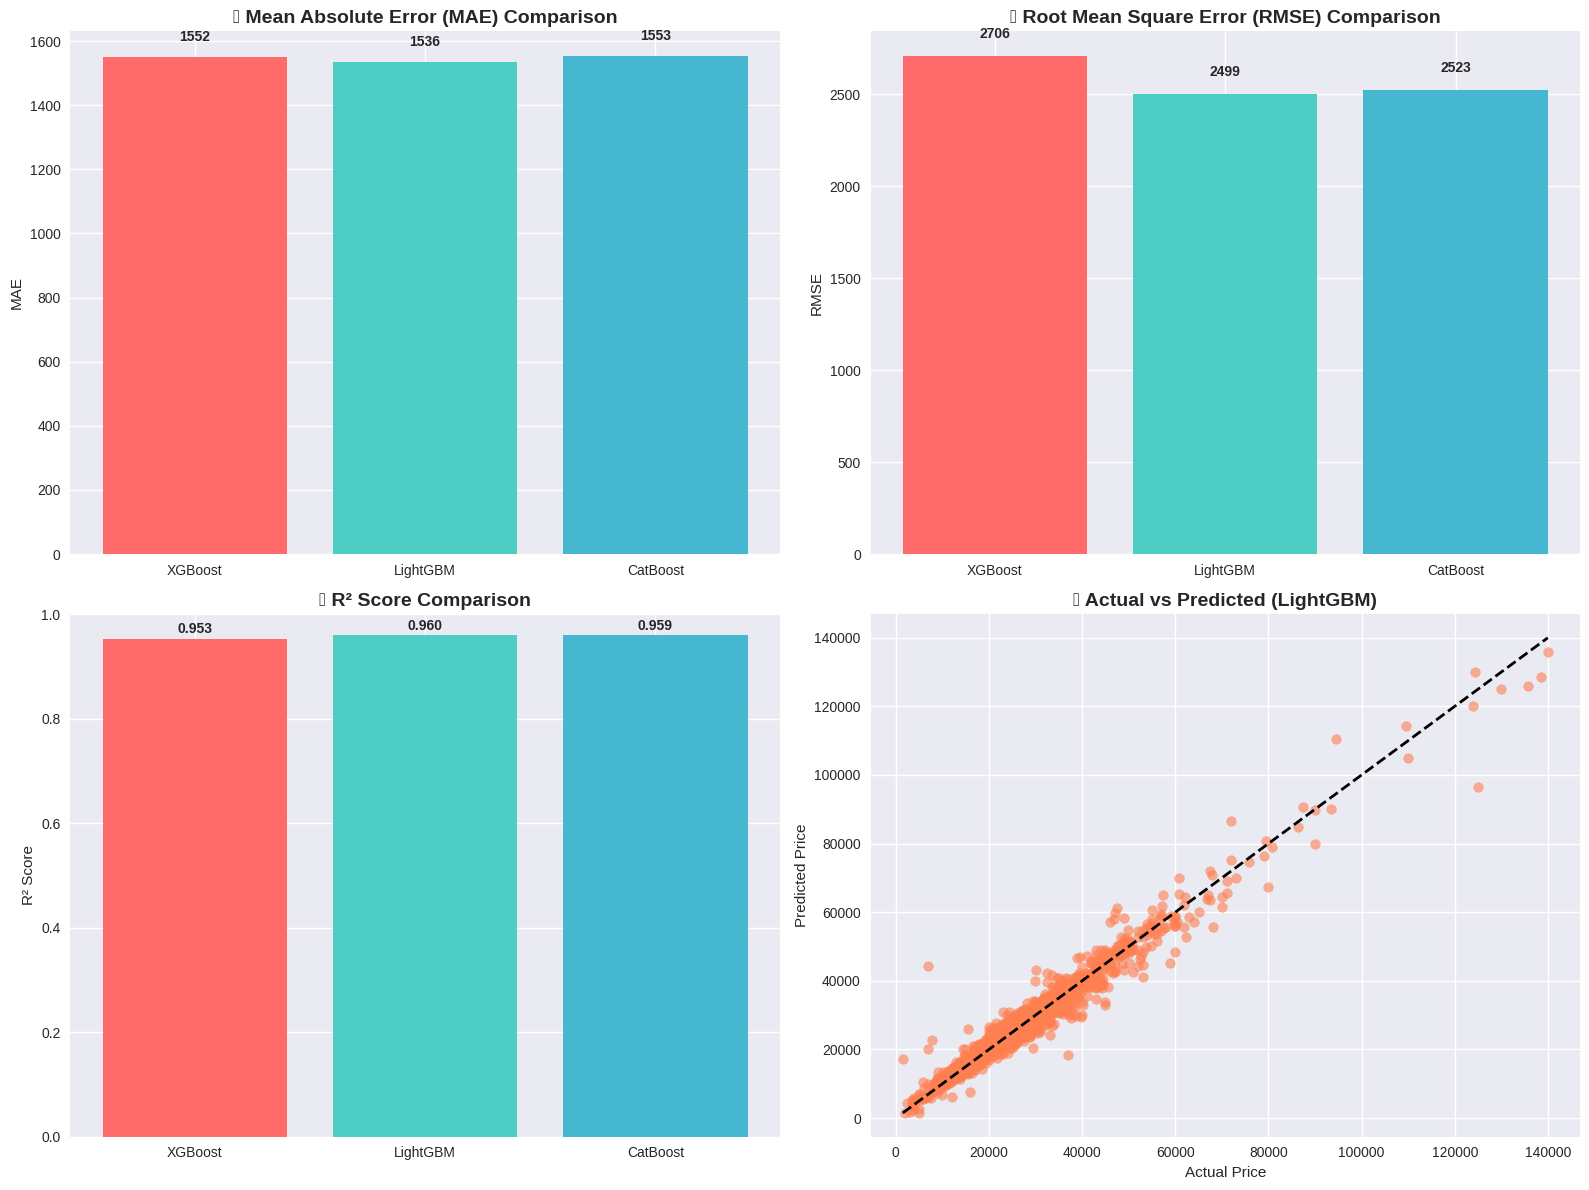

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. MAE Comparison
axes[0, 0].bar(results_df['Model'], results_df['MAE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 0].set_title('📉 Mean Absolute Error (MAE) Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('MAE')
for i, v in enumerate(results_df['MAE']):
    axes[0, 0].text(i, v + 50, f'{v:.0f}', ha='center', fontweight='bold')

# 2. RMSE Comparison
axes[0, 1].bar(results_df['Model'], results_df['RMSE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 1].set_title('📈 Root Mean Square Error (RMSE) Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
for i, v in enumerate(results_df['RMSE']):
    axes[0, 1].text(i, v + 100, f'{v:.0f}', ha='center', fontweight='bold')

# 3. R² Score Comparison
axes[1, 0].bar(results_df['Model'], results_df['R² Score'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 0].set_title('🎯 R² Score Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_ylim(0, 1)
for i, v in enumerate(results_df['R² Score']):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# 4. Actual vs Predicted (for best model)
if best_model == 'XGBoost':
    best_predictions = xgb_predictions
elif best_model == 'LightGBM':
    best_predictions = lgb_predictions
else:
    best_predictions = cb_predictions

axes[1, 1].scatter(y_test, best_predictions, alpha=0.6, color='coral')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 1].set_title(f'🔍 Actual vs Predicted ({best_model})', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()

## 🔍 Feature Importance Analysis

Let's examine which features the best performing model considers most important.

In [23]:
# Get feature importance from the best model
if best_model == 'XGBoost':
    feature_importance = xgb_model.feature_importances_
    feature_names = X_train_xgb.columns
elif best_model == 'LightGBM':
    feature_importance = lgb_model.feature_importances_
    feature_names = X_train_xgb.columns
else:
    feature_importance = cb_model.feature_importances_
    feature_names = X_train_cb.columns

In [24]:
# Create feature importance DataFrame
feature_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

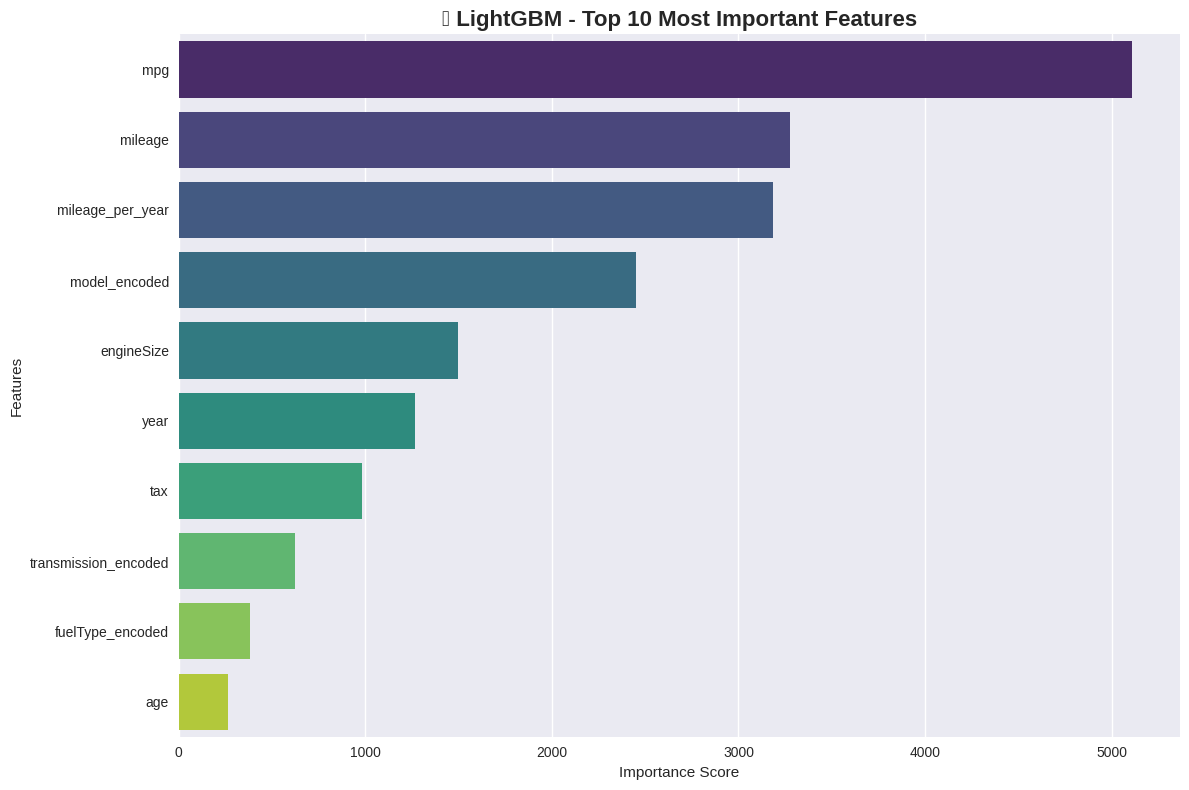

🔍 Most Important Features:
                feature  importance
3                   mpg        5111
1               mileage        3279
6      mileage_per_year        3186
7         model_encoded        2453
4            engineSize        1498
0                  year        1267
2                   tax         981
8  transmission_encoded         622
9      fuelType_encoded         381
5                   age         264


In [25]:
# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_imp_df.head(10), x='importance', y='feature', palette='viridis')
plt.title(f'🏆 {best_model} - Top 10 Most Important Features', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("🔍 Most Important Features:")
print(feature_imp_df.head(10))

## 📋 Results and Recommendations

### 🏆 Model Performance Summary:

In [26]:
print("\n" + "="*60)
print("🎉 RESULTS AND RECOMMENDATIONS")
print("="*60)

for i, row in results_df.iterrows():
    print(f"{row['Model']:10} | MAE: {row['MAE']:6.0f} | RMSE: {row['RMSE']:6.0f} | R²: {row['R² Score']:.4f}")

print(f"\n🥇 Winner Model: {best_model}")
print(f"🎯 Best R² Score: {results_df['R² Score'].max():.4f}")

print(f"""
📝 RESULTS:

1. 🏆 **{best_model}** showed the best performance
2. 📊 All models performed in the range of {results_df['R² Score'].min():.3f} - {results_df['R² Score'].max():.3f} R²
3. 🔍 Most important features: {', '.join(feature_imp_df.head(3)['feature'].tolist())}
""")


🎉 RESULTS AND RECOMMENDATIONS
XGBoost    | MAE:   1552 | RMSE:   2706 | R²: 0.9531
LightGBM   | MAE:   1536 | RMSE:   2499 | R²: 0.9600
CatBoost   | MAE:   1553 | RMSE:   2523 | R²: 0.9592

🥇 Winner Model: LightGBM
🎯 Best R² Score: 0.9600

📝 RESULTS:

1. 🏆 **LightGBM** showed the best performance
2. 📊 All models performed in the range of 0.953 - 0.960 R²
3. 🔍 Most important features: mpg, mileage, mileage_per_year

